In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import calendar
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import Birch
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Read Data

In [2]:
comm = pd.read_csv("commercial.csv")
print("Commercial Data")
print("Shape:", comm.shape)
print("Columns:", comm.columns.to_list())

print("\nWild Data")
wild = pd.read_csv("wild.csv")
print("Shape:", wild.shape)
print("Columns:", wild.columns.to_list())

Commercial Data
Shape: (755, 5)
Columns: ['County', 'State', 'Outbreak Date', 'Flock Type', 'Flock Size']

Wild Data
Shape: (6161, 8)
Columns: ['State', 'County', 'Date Detected', 'HPAI Strain', 'Bird Species', 'WOAH Classification', 'Sampling Method', 'Submitting Agency']


In [3]:
comm

,County,State,Outbreak Date,Flock Type,Flock Size
0,Snohomish,Washington,12-30-2022,WOAH Poultry,180
1,Sanilac,Michigan,12-30-2022,WOAH Non-Poultry,30
2,Pierce,Washington,12-29-2022,WOAH Non-Poultry,40
3,Elk,Kansas,12-28-2022,WOAH Non-Poultry,30
4,Weakley,Tennessee,12-28-2022,Commercial Broiler Breeder,19000
...,...,...,...,...,...
750,Weld,Colorado,01-06-2023,WOAH Non-Poultry,40
751,Codington,South Dakota,01-05-2023,WOAH Poultry,140
752,Johnson,Missouri,01-04-2023,WOAH Non-Poultry,30
753,Josephine,Oregon,01-04-2023,WOAH Non-Poultry,30


In [4]:
wild

,State,County,Date Detected,HPAI Strain,Bird Species,WOAH Classification,Sampling Method,Submitting Agency
0,South Carolina,Colleton,1/13/2022,EA H5N1,American wigeon,Wild bird,Hunter harvest,NWDP
1,South Carolina,Colleton,1/13/2022,EA H5N1,Blue-winged teal,Wild bird,Hunter harvest,NWDP
2,North Carolina,Hyde,1/12/2022,EA H5N1,Northern shoveler,Wild bird,Hunter harvest,NWDP
3,North Carolina,Hyde,1/20/2022,EA H5N1,American wigeon,Wild bird,Hunter harvest,NWDP
4,North Carolina,Hyde,1/20/2022,EA H5,Gadwall,Wild bird,Hunter harvest,NWDP
...,...,...,...,...,...,...,...,...
6156,Massachusetts,Hampden,2/3/2023,EA H5N1,Mallard,Wild bird,Live bird,NWDP
6157,Massachusetts,Hampden,2/3/2023,EA H5N1,Mallard,Wild bird,Live bird,NWDP
6158,Florida,Leon,2/1/2023,EA H5N1,Bald eagle,Wild bird,Morbidity/Mortizlity,SCWDS
6159,South Carolina,Colleton,1/31/2023,EA H5N1,Bald eagle,Wild bird,Morbidity/Mortizlity,SCWDS


### Add month column

In [5]:
comm['month'] = pd.DatetimeIndex(comm['Outbreak Date']).month
wild['month'] = pd.DatetimeIndex(wild['Date Detected']).month

## EDA

In [6]:
print(comm.isna().sum())
print(wild.isna().sum())

County           0
State            0
Outbreak Date    0
Flock Type       0
Flock Size       0
month            0
dtype: int64
State                  0
County                 0
Date Detected          0
HPAI Strain            1
Bird Species           0
WOAH Classification    0
Sampling Method        0
Submitting Agency      0
month                  0
dtype: int64


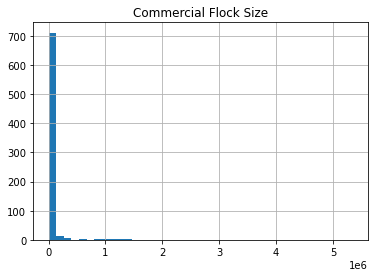

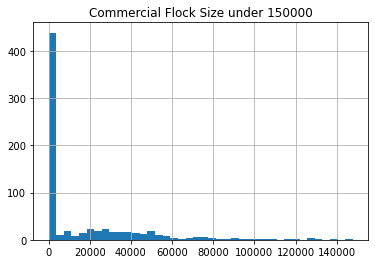

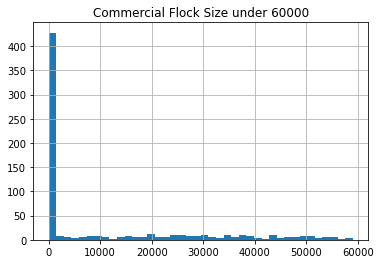

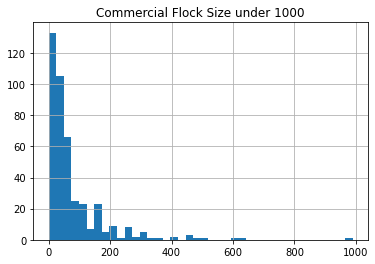

5347500


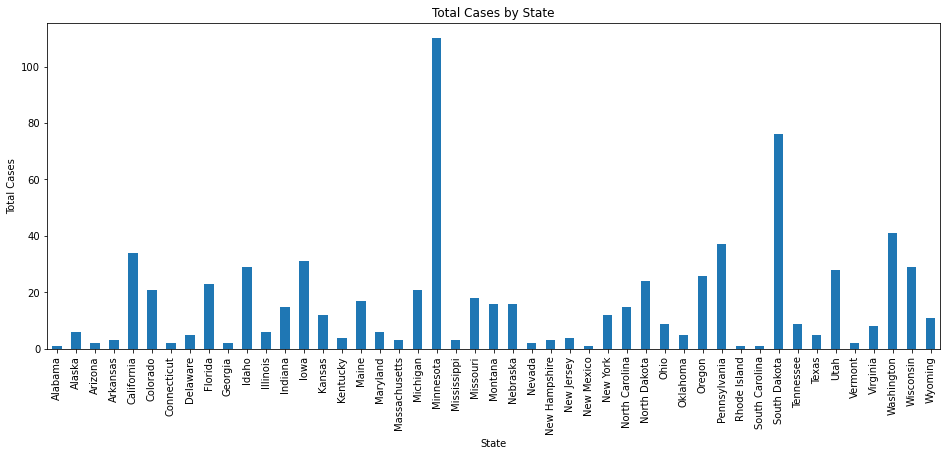

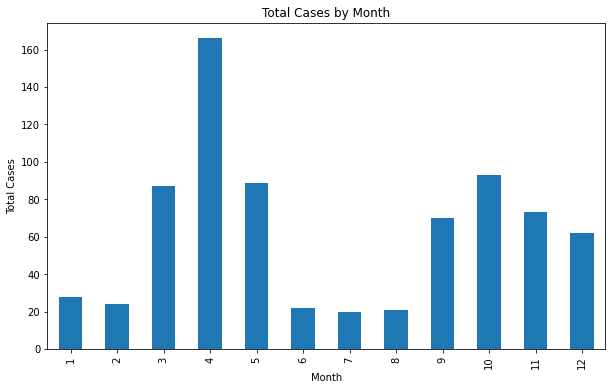

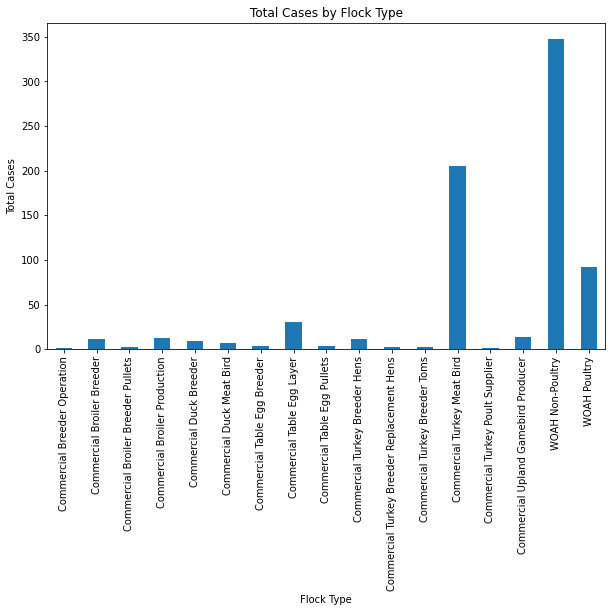

In [7]:
# Commercial
comm['Flock Size'].hist(bins=40)
plt.title("Commercial Flock Size")
plt.show()
comm[comm['Flock Size'] < 150000]['Flock Size'].hist(bins=40)
plt.title("Commercial Flock Size under 150000")
plt.show()
comm[comm['Flock Size'] < 60000]['Flock Size'].hist(bins=40)
plt.title("Commercial Flock Size under 60000")
plt.show()
comm[comm['Flock Size'] < 1000]['Flock Size'].hist(bins=40)
plt.title("Commercial Flock Size under 1000")
plt.show()

print(max(comm['Flock Size']))

comm_state = comm.groupby(['State'])['Outbreak Date'].count()
comm_state.plot(kind='bar', title="Total Cases by State", ylabel="Total Cases", xlabel="State", figsize=(16,6))
plt.show()

comm_month = comm.groupby(['month'])['Outbreak Date'].count()
comm_month.plot(kind='bar', title="Total Cases by Month", ylabel="Total Cases", xlabel="Month", figsize=(10,6))
plt.show()

comm_flock = comm.groupby(['Flock Type'])['Outbreak Date'].count()
comm_flock.plot(kind='bar', title="Total Cases by Flock Type", ylabel="Total Cases", xlabel="Flock Type", figsize=(10,6))
plt.show()

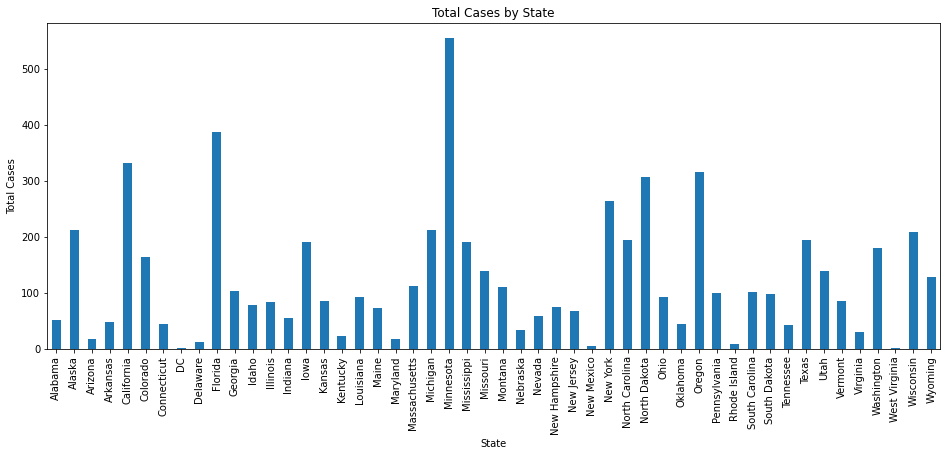

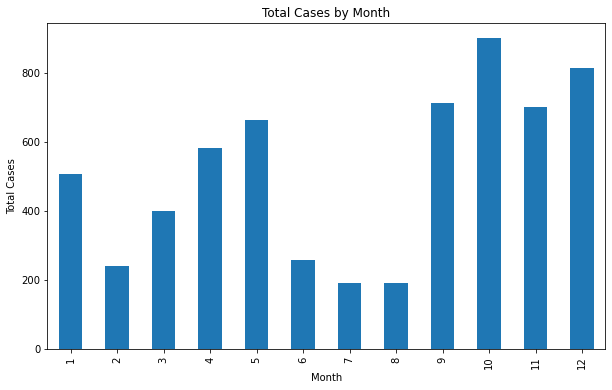

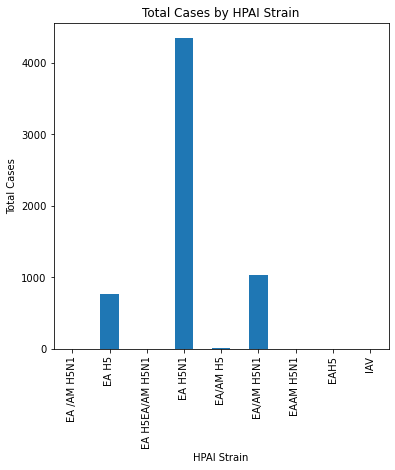

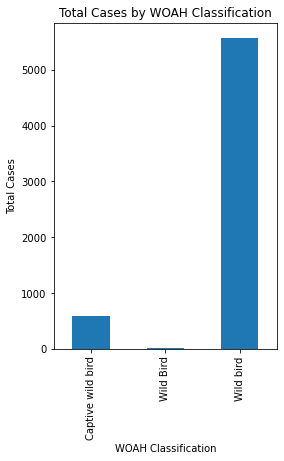

In [8]:
# Wild
wild_state = wild.groupby(['State'])['Date Detected'].count()
wild_state.plot(kind='bar', title="Total Cases by State", ylabel="Total Cases", xlabel="State", figsize=(16,6))
plt.show()

wild_month = wild.groupby(['month'])['Date Detected'].count()
wild_month.plot(kind='bar', title="Total Cases by Month", ylabel="Total Cases", xlabel="Month", figsize=(10,6))
plt.show()

wild_strain = wild.groupby(['HPAI Strain'])['Date Detected'].count()
wild_strain.plot(kind='bar', title="Total Cases by HPAI Strain", ylabel="Total Cases", xlabel="HPAI Strain", figsize=(6,6))
plt.show()

# wild_WOAH = wild.groupby(['Bird Species'])['Date Detected'].count()
# wild_WOAH.plot(kind='bar', title="Total Cases by Bird Species", ylabel="Total Cases", xlabel="Bird Species", figsize=(4,6))
# plt.show()

wild_WOAH = wild.groupby(['WOAH Classification'])['Date Detected'].count()
wild_WOAH.plot(kind='bar', title="Total Cases by WOAH Classification", ylabel="Total Cases", xlabel="WOAH Classification", figsize=(4,6))
plt.show()

## Format Commercial Data
Group by State, County, Outbreak Data

Columns are "Outbreak Count", "Flock Size Mean", "Total Cases"

In [9]:
comm['Day'] = pd.DatetimeIndex(comm['Outbreak Date']).day
comm['Month'] = pd.DatetimeIndex(comm['Outbreak Date']).month

comm_format = comm.groupby(['State', 'County', 'Day', 'Month']).agg({'Flock Type': ['count'], "Flock Size":['mean', 'sum']})
comm_format.columns = ['Commercial Outbreak Count', 'Commercial Flock Size Mean', 'Total Commercial Cases']
comm_format = comm_format.reset_index()
comm_format['Is Commercial Outbreak'] = 1
print(comm_format)

# comm_format_month = comm.groupby(['State', 'County', 'month']).agg({'Flock Type': ['count'], "Flock Size":['mean', 'sum']})
# comm_format_month.columns = ['Outbreak Count', 'Flock Size Mean', 'Total Cases']
# comm_format_month = comm_format_month.reset_index()

# print(comm_format_month)

       State             County  Day  Month  Commercial Outbreak Count  \
0    Alabama           Lawrence    5     12                          1   
1     Alaska             Bethel    2      8                          1   
2     Alaska  Matanuska Susitna    5     10                          2   
3     Alaska  Matanuska Susitna   14     10                          1   
4     Alaska  Matanuska Susitna   25     11                          1   
..       ...                ...  ...    ...                        ...   
703  Wyoming               Park    6      2                          1   
704  Wyoming               Park    6      4                          1   
705  Wyoming               Park   30      3                          1   
706  Wyoming           Sheridan    5      4                          1   
707  Wyoming           Sheridan   13      5                          1   

     Commercial Flock Size Mean  Total Commercial Cases  \
0                         460.0                     

## Format Wild Data
Group by State, County, Outbreak Data

Columns are "Outbreak Count", "Flock Size Mean", "Total Cases"

In [10]:
# ['State', 'County', 'Date Detected', 'HPAI Strain', 'Bird Species', 
#  'WOAH Classification', 'Sampling Method', 'Submitting Agency']
wild['Day'] = pd.DatetimeIndex(wild['Date Detected']).day
wild['Month'] = pd.DatetimeIndex(wild['Date Detected']).month


wild_format = wild.groupby(['State', 'County', 'Day', 'Month']).agg({'HPAI Strain':['count']})
wild_format.columns = ['Wild Outbreak Count']
wild_format = wild_format.reset_index()

wild_format['Is Wild Outbreak'] = 1

print(wild_format)

        State    County  Day  Month  Wild Outbreak Count  Is Wild Outbreak
0     Alabama    Clarke   26      1                    1                 1
1     Alabama   Cullman    4      1                    1                 1
2     Alabama   Cullman   13     12                    1                 1
3     Alabama    Elmore   10     11                    2                 1
4     Alabama   Jackson   12      1                    1                 1
...       ...       ...  ...    ...                  ...               ...
2492  Wyoming     Teton   19      5                    1                 1
2493  Wyoming     Teton   26      5                    1                 1
2494  Wyoming     Teton   28      4                    3                 1
2495  Wyoming     Teton   29      9                    1                 1
2496  Wyoming  Washakie   26      1                    1                 1

[2497 rows x 6 columns]


## Merge Datasets

In [11]:
# Join commercial and wild on date column
df1 = comm_format.merge(wild_format, on=['State', 'County', 'Month', 'Day'], how='outer')
df1 = df1.fillna(0)

print(len(df1.loc[(df1['Is Commercial Outbreak'] == 1) & (df1['Is Wild Outbreak'] == 1)]))
print(df1.loc[(df1['Is Commercial Outbreak'] == 1) & (df1['Is Wild Outbreak'] == 1)])

19
            State     County  Day  Month  Commercial Outbreak Count  \
100         Idaho        Ada   19      5                        2.0   
104         Idaho     Canyon   13      5                        1.0   
107         Idaho     Canyon   19      5                        2.0   
219      Michigan     Macomb   24      3                        1.0   
230     Minnesota      Anoka    6      5                        1.0   
242     Minnesota     Carver   28      4                        1.0   
245     Minnesota    Chisago   12      5                        1.0   
303     Minnesota    Stearns   20      4                        2.0   
350       Montana     Fergus    6      5                        1.0   
386    New Jersey   Monmouth   17      5                        1.0   
398      New York    Suffolk   25      3                        1.0   
435  North Dakota   Stutsman   19      4                        1.0   
461        Oregon  Deschutes   21      7                        1.0   
513

There is no overlap between these two datasets (no concurrent wild and commercial cases in the same county on the same date)

In [12]:
# Remove Day column from wild and commercial
comm_format = comm_format.drop(columns=['Day'])
wild_format = wild_format.drop(columns=['Day'])

# Join on month
df = comm_format.merge(wild_format, on=['State', 'County', 'Month'], how='outer')
df = df.fillna(0)

print(df.loc[(df['Is Commercial Outbreak'] == 1) & (df['Is Wild Outbreak'] == 1)])
print(len(df.loc[(df['Is Commercial Outbreak'] == 1) & (df['Is Wild Outbreak'] == 1)]))

# cm = confusion_matrix(df['Is Commercial Outbreak'], df['Is Wild Outbreak'])
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# disp.plot()
# plt.show()

          State     County  Month  Commercial Outbreak Count  \
11   California      Butte      8                        1.0   
12   California      Butte      8                        1.0   
13   California      Butte     12                        1.0   
17   California  El Dorado      9                        1.0   
18   California  El Dorado      1                        1.0   
..          ...        ...    ...                        ...   
835     Wyoming       Park      4                        1.0   
836     Wyoming       Park      4                        1.0   
838     Wyoming   Sheridan      4                        1.0   
839     Wyoming   Sheridan      4                        1.0   
840     Wyoming   Sheridan      5                        1.0   

     Commercial Flock Size Mean  Total Commercial Cases  \
11                       1100.0                  1100.0   
12                       1100.0                  1100.0   
13                         20.0                    20.

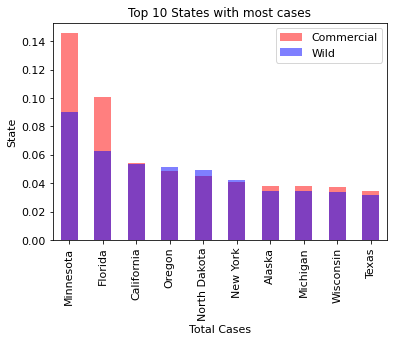

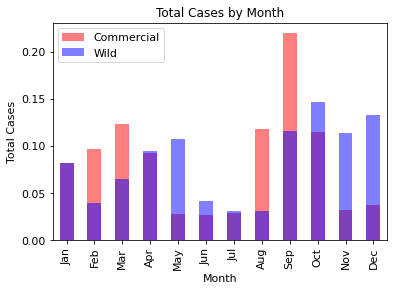

In [86]:
temp = (comm['State'].value_counts(normalize=True)).iloc[:10]
temp.plot(kind='bar', figsize=(6,4), fontsize = 11, color='red', alpha=0.5, label='Commercial')
temp = (wild['State'].value_counts(normalize=True)).iloc[:10]
temp.plot(kind='bar', figsize=(6,4), fontsize = 11, color='blue', alpha=0.5, label='Wild')
plt.xlabel("Total Cases", fontsize = 11)
plt.ylabel("State", fontsize = 11)
plt.title("Top 10 States with most cases", fontsize = 12)
plt.legend(fontsize=11)
plt.show()

print('\n')

temp = comm['Month'].value_counts(normalize=True, sort=False)
temp.plot(kind='bar', figsize=(6,4), fontsize = 11, color='red', alpha=0.5, label='Commercial')
temp = wild['Month'].value_counts(normalize=True, sort=False)
temp.plot(kind='bar', figsize=(6,4), fontsize = 11, color='blue', alpha=0.5, label='Wild')
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11], labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel("Month", fontsize = 11)
plt.ylabel("Total Cases", fontsize = 11)
plt.title("Total Cases by Month", fontsize = 12)
plt.legend(fontsize=11)
plt.show()

# Modeling
## Classification (binary)

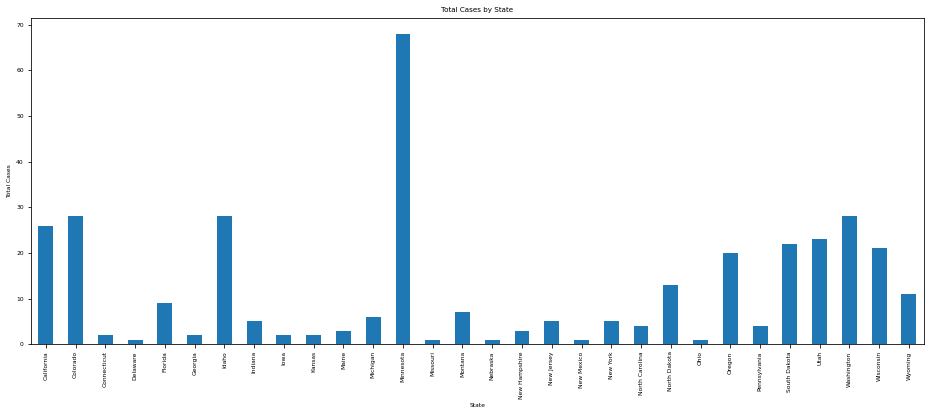

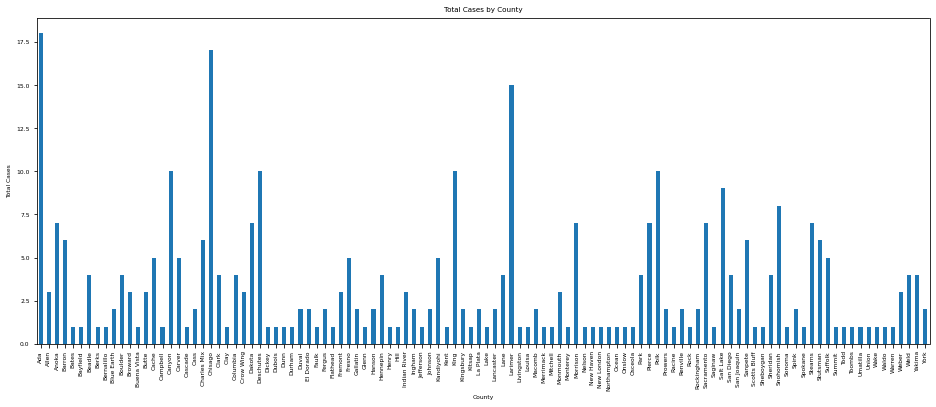

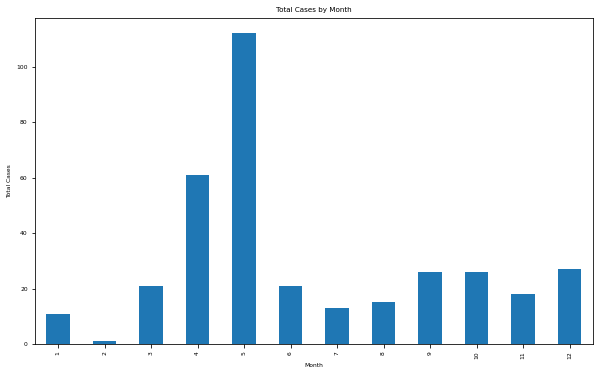

In [87]:
# EDA on months with both commercial and wild outbreak
df_both = df.loc[(df['Is Commercial Outbreak'] == 1) & (df['Is Wild Outbreak'] == 1)]

temp = df_both.groupby(['State'])['Month'].count()
temp.plot(kind='bar', title="Total Cases by State", ylabel="Total Cases", xlabel="State", figsize=(16,6))
plt.show()

temp = df_both.groupby(['County'])['Month'].count()
temp.plot(kind='bar', title="Total Cases by County", ylabel="Total Cases", xlabel="County", figsize=(16,6))
plt.show()

temp = df_both.groupby(['Month'])['State'].count()
temp.plot(kind='bar', title="Total Cases by Month", ylabel="Total Cases", xlabel="Month", figsize=(10,6))
plt.show()

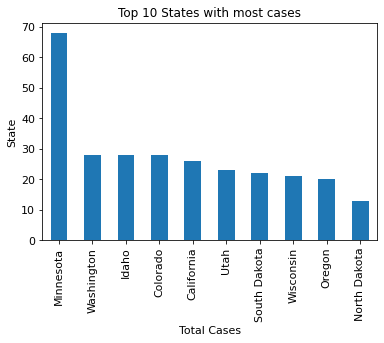

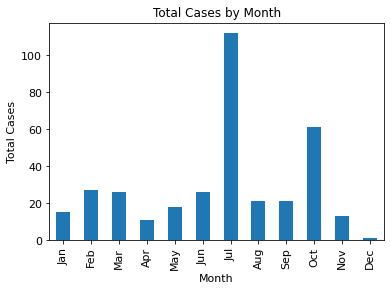

In [89]:
temp = (df_both['State'].value_counts(normalize=False)).iloc[:10]
temp.plot(kind='bar', figsize=(6,4), fontsize = 11)
plt.xlabel("Total Cases", fontsize = 11)
plt.ylabel("State", fontsize = 11)
plt.title("Top 10 States with most cases", fontsize = 12)
plt.show()

print('\n')

temp = df_both['Month'].value_counts(normalize=False, sort=False)
temp.plot(kind='bar', figsize=(6,4), fontsize = 11)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11], labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel("Month", fontsize = 11)
plt.ylabel("Total Cases", fontsize = 11)
plt.title("Total Cases by Month", fontsize = 12)
plt.show()

### Random Forest Classification

In [91]:
df_dummies = pd.get_dummies(df.drop(columns=['Commercial Outbreak Count', 'Commercial Flock Size Mean'
                                             , 'Total Commercial Cases', 'Wild Outbreak Count', 'County']))

print(df_dummies.columns.tolist())
print(len(df_dummies.columns.tolist()))
print(df_dummies)

y = df_dummies['Is Commercial Outbreak']
X_df = df_dummies.drop(columns=['Is Commercial Outbreak'])
Xcols = X_df.columns.tolist()
X = X_df.to_numpy()

['Month', 'Is Commercial Outbreak', 'Is Wild Outbreak', 'State_Alabama', 'State_Alaska', 'State_Arizona', 'State_Arkansas', 'State_California', 'State_Colorado', 'State_Connecticut', 'State_DC', 'State_Delaware', 'State_Florida', 'State_Georgia', 'State_Idaho', 'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas', 'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Maryland', 'State_Massachusetts', 'State_Michigan', 'State_Minnesota', 'State_Mississippi', 'State_Missouri', 'State_Montana', 'State_Nebraska', 'State_Nevada', 'State_New Hampshire', 'State_New Jersey', 'State_New Mexico', 'State_New York', 'State_North Carolina', 'State_North Dakota', 'State_Ohio', 'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania', 'State_Rhode Island', 'State_South Carolina', 'State_South Dakota', 'State_Tennessee', 'State_Texas', 'State_Utah', 'State_Vermont', 'State_Virginia', 'State_Washington', 'State_West Virginia', 'State_Wisconsin', 'State_Wyoming']
53
      Month  Is Commerc

Accuracy Score for Random Forest Classifier: 0.8933764135702746


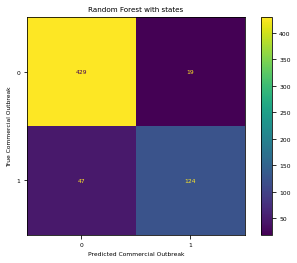

Feature Importances


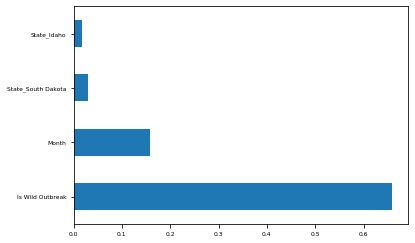

In [92]:
# Random Forest Classifier
from sklearn.model_selection import train_test_split
np.random
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print("Accuracy Score for Random Forest Classifier:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title("Random Forest with states")
plt.xlabel("Predicted Commercial Outbreak")
plt.ylabel("True Commercial Outbreak")
plt.show()

# Importances
print("Feature Importances")
# importances = rfc.feature_importances_
# sorted_indices = np.argsort(importances)[::-1]
 
# for f in range(X.shape[1]):
#     print("%2d) %-*s %f" % (f + 1, 30,
#                             Xcols[sorted_indices[f]],
#                             importances[sorted_indices[f]]))
(pd.Series(rfc.feature_importances_, index=X_df.columns)
   .nlargest(4)
   .plot(kind='barh'))
plt.show()

In [93]:
# Random Forest Classifier without states, month dummies
temp_dummies2 = df[[ 'Is Wild Outbreak', 'Month']]

month_num = temp_dummies2['Month']
month_names = []
for i in range(len(month_num)):
    month_names.append(calendar.month_name[month_num[i]])

temp_dummies2['Month'] = month_names
df_dummies2 = pd.get_dummies(temp_dummies2)

X2cols = df_dummies2.columns.tolist()
print(X2cols)
X2 = df_dummies2.to_numpy()

['Is Wild Outbreak', 'Month_April', 'Month_August', 'Month_December', 'Month_February', 'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May', 'Month_November', 'Month_October', 'Month_September']


<ipython-input-93-f3b8ffca1124>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_dummies2['Month'] = month_names


Accuracy Score for Random Forest Classifier without states: 0.8820678513731826


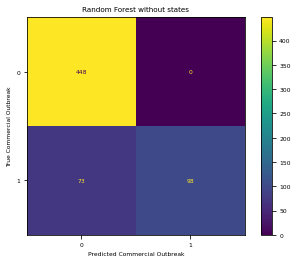

Feature Importances


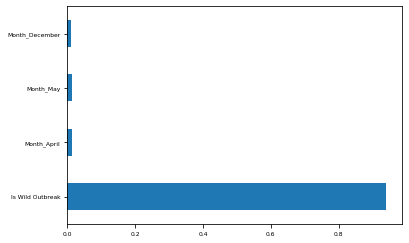

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=0)

rfc2 = RandomForestClassifier()
rfc2.fit(X_train, y_train)

y_pred = rfc2.predict(X_test)

print("Accuracy Score for Random Forest Classifier without states:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title("Random Forest without states")
plt.xlabel("Predicted Commercial Outbreak")
plt.ylabel("True Commercial Outbreak")
plt.show()

# Importances
print("Feature Importances")
# importances = rfc2.feature_importances_
# sorted_indices = np.argsort(importances)[::-1]
 
# for f in range(len(X2[0])):
#     print("%2d) %-*s %f" % (f + 1, 30,
#                             X2cols[sorted_indices[f]],
#                             importances[sorted_indices[f]]))
(pd.Series(rfc2.feature_importances_, index=X2cols)
   .nlargest(4)
   .plot(kind='barh'))
plt.show()

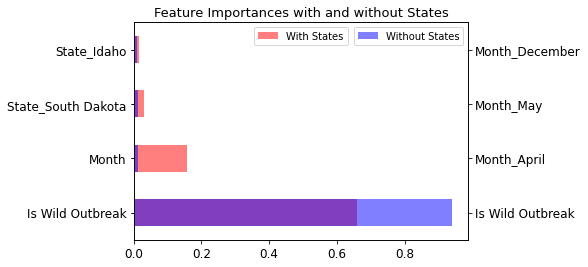

In [147]:
fig, ax1 = plt.subplots()
(pd.Series(rfc.feature_importances_, index=X_df.columns)
   .nlargest(4)
   .plot(kind='barh', color='red', alpha=0.5, label='With States', fontsize=12))
ax1.tick_params(bottom=True, top=False, left=True, right=False)
ax1.legend(fontsize=10, loc='upper center')

ax2 = ax1.twinx()
(pd.Series(rfc2.feature_importances_, index=X2cols)
   .nlargest(4)
   .plot(kind='barh', color='blue', alpha=0.5, label='Without States', fontsize=12))
ax2.tick_params(bottom=True, top=False, left=False, right=True)
ax2.legend(fontsize=10, loc='upper right')

plt.title("Feature Importances with and without States", fontsize=13)
plt.xlabel("Feature Importance", fontsize=12)
plt.tick_params(bottom=True, top=False, left=True, right=True)
plt.show()

### KNN Classification

Accuracy Score for KNN Classifier: 0.8416801292407108


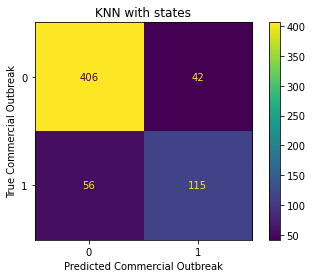

In [19]:
df_dummies = pd.get_dummies(df.drop(columns=['Commercial Outbreak Count', 'Commercial Flock Size Mean'
                                             , 'Total Commercial Cases', 'Wild Outbreak Count', 'County']))
y = df_dummies['Is Commercial Outbreak']
X = df_dummies.drop(columns=['Is Commercial Outbreak'])
Xcols = X.columns.tolist()
X = X.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

knn = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
y_pred = knn.predict(X_test)

print("Accuracy Score for KNN Classifier:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title("KNN with states")
plt.xlabel("Predicted Commercial Outbreak")
plt.ylabel("True Commercial Outbreak")
plt.show()

['Is Wild Outbreak', 'Month_April', 'Month_August', 'Month_December', 'Month_February', 'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May', 'Month_November', 'Month_October', 'Month_September']
Accuracy Score for KNN Classifier: 0.7883683360258481


<ipython-input-20-af19818c860d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_dummies2['Month'] = month_names


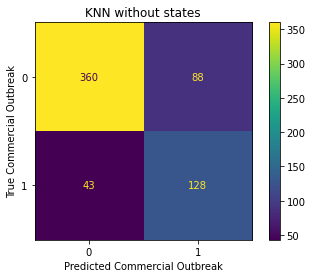

In [20]:
# KNN Classifier without states, month dummies
temp_dummies2 = df[['Is Wild Outbreak', 'Month']]

month_num = temp_dummies2['Month']
month_names = []
for i in range(len(month_num)):
    month_names.append(calendar.month_name[month_num[i]])

temp_dummies2['Month'] = month_names
df_dummies2 = pd.get_dummies(temp_dummies2)

X2cols = df_dummies2.columns.tolist()
print(X2cols)
X2 = df_dummies2.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=0)

knn = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
y_pred = knn.predict(X_test)

# print("Cluster Centers:", kmeans.cluster_centers_)

print("Accuracy Score for KNN Classifier:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title("KNN without states")
plt.xlabel("Predicted Commercial Outbreak")
plt.ylabel("True Commercial Outbreak")
plt.show()

## Clustering

### Kmeans clustering

<ipython-input-85-0de631ea6009>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_dummies['Month'] = month_names


Index(['Commercial Outbreak Count', 'Total Commercial Cases',
       'Wild Outbreak Count', 'Month_April', 'Month_August', 'Month_December',
       'Month_February', 'Month_January', 'Month_July', 'Month_June',
       'Month_March', 'Month_May', 'Month_November', 'Month_October',
       'Month_September', 'State_Alabama', 'State_Alaska', 'State_Arizona',
       'State_Arkansas', 'State_California', 'State_Colorado',
       'State_Connecticut', 'State_DC', 'State_Delaware', 'State_Florida',
       'State_Georgia', 'State_Idaho', 'State_Illinois', 'State_Indiana',
       'State_Iowa', 'State_Kansas', 'State_Kentucky', 'State_Louisiana',
       'State_Maine', 'State_Maryland', 'State_Massachusetts',
       'State_Michigan', 'State_Minnesota', 'State_Mississippi',
       'State_Missouri', 'State_Montana', 'State_Nebraska', 'State_Nevada',
       'State_New Hampshire', 'State_New Jersey', 'State_New Mexico',
       'State_New York', 'State_North Carolina', 'State_North Dakota',
       'Stat

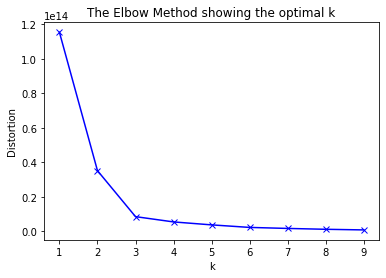

elbow is 3 so use 3 clusters


In [85]:
temp_dummies = df[['Commercial Outbreak Count', 'Total Commercial Cases', 'Wild Outbreak Count', 'Month', 'State']]

month_num = temp_dummies['Month']
month_names = []
for i in range(len(month_num)):
    month_names.append(calendar.month_name[month_num[i]])

temp_dummies['Month'] = month_names
df_dummies = pd.get_dummies(temp_dummies)

print(df_dummies.columns)

Xcols = df_dummies.columns.tolist()
# print(Xcols)
X = df_dummies.to_numpy()

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

print("elbow is 3 so use 3 clusters")

In [86]:
kmeans = KMeans(n_clusters=3).fit(X)

clusters = kmeans.predict(X)

# Plot 2 principal components with clustering (PCA)
X_scale = StandardScaler().fit_transform(X)

pca = PCA(n_components=2).fit(X_scale)

principalComponents = pca.fit_transform(X_scale)

pca_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pca_df['Cluster'] = clusters

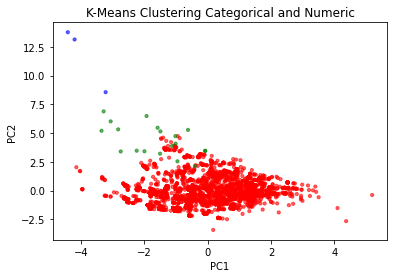

cluster 0: 3072
cluster 1: 19
cluster 2: 3


In [87]:
# Plot 2 principal components with clustering (PCA)
X_scale = StandardScaler().fit_transform(X)

pca = PCA(n_components=2).fit(X_scale)

principalComponents = pca.fit_transform(X_scale)

pca_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pca_df['Cluster'] = clusters

colors = ['r', 'g', 'b']
pca_df['c'] = pca_df.Cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

plt.scatter(pca_df.PC1, pca_df.PC2, c=pca_df.c, alpha = 0.6, s=10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering Categorical and Numeric')
plt.show()


print('cluster 0:', len(pca_df[pca_df['Cluster'] == 0]))
print('cluster 1:', len(pca_df[pca_df['Cluster'] == 1]))
print('cluster 2:', len(pca_df[pca_df['Cluster'] == 2]))


Index(['Commercial Outbreak Count', 'Total Commercial Cases',
       'Wild Outbreak Count', 'Month'],
      dtype='object')


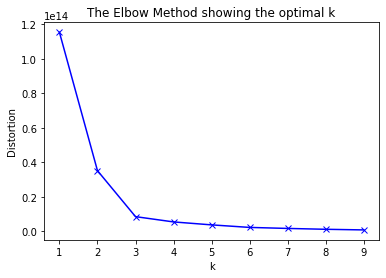

elbow is 3 so use 3 clusters


In [88]:
X_df = df[['Commercial Outbreak Count', 'Total Commercial Cases', 'Wild Outbreak Count', 'Month']]
print(X_df.columns)
X = X_df.to_numpy()

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

print("elbow is 3 so use 3 clusters")

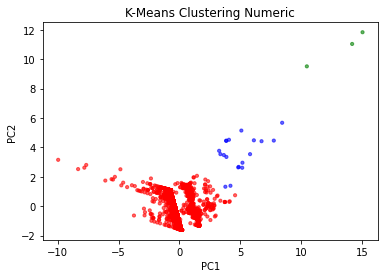

In [89]:
kmeans = KMeans(n_clusters=3).fit(X)
clusters = kmeans.predict(X)

# Plot 2 principal components with clustering (PCA)
X_scale = StandardScaler().fit_transform(X)

pca = PCA(n_components=2).fit(X_scale)

principalComponents = pca.fit_transform(X_scale)

pca_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pca_df['Cluster'] = clusters

colors = ['r', 'g', 'b']
pca_df['c'] = pca_df.Cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

plt.scatter(pca_df.PC1, pca_df.PC2, c=pca_df.c, alpha = 0.6, s=10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering Numeric')
plt.show()

In [90]:
X_df['Cluster'] = pd.Series(clusters, dtype='category')

print('cluster 0:', len(X_df[X_df['Cluster'] == 0]))
print('cluster 1:', len(X_df[X_df['Cluster'] == 1]))
print('cluster 2:', len(X_df[X_df['Cluster'] == 2]))

# print("Commercial Outbreak by Cluster")
# X_df['Commercial Outbreak Count'].hist(by=X_df['Cluster'])
# plt.show()

# print("\nWild Outbreak by Cluster")
# X_df['Wild Outbreak Count'].hist(by=X_df['Cluster'])
# plt.show()

# print("\nMonth Outbreak by Cluster")
# X_df['Month'].hist(by=X_df['Cluster'], bins=12)
# plt.show()

cluster 0: 3072
cluster 1: 3
cluster 2: 19


<ipython-input-90-5a756f45794a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df['Cluster'] = pd.Series(clusters, dtype='category')


### Birch Clustering

<ipython-input-94-e57e0e61dfb7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_dummies['Month'] = month_names


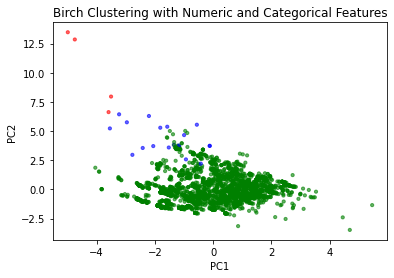

cluster 0: 4
cluster 1: 3072
cluster 2: 18


In [94]:
from sklearn.cluster import Birch

temp_dummies = df[['Commercial Outbreak Count', 'Total Commercial Cases', 'Wild Outbreak Count', 'Month', 'State']]

month_num = temp_dummies['Month']
month_names = []
for i in range(len(month_num)):
    month_names.append(calendar.month_name[month_num[i]])

temp_dummies['Month'] = month_names
df_dummies = pd.get_dummies(temp_dummies)

Xcols = df_dummies.columns.tolist()
# print(Xcols)
X = df_dummies.to_numpy()

birch = Birch(threshold=0.01, n_clusters=3).fit(X)

clusters = birch.predict(X)

# Plot 2 principal components with clustering (PCA)
X_scale = StandardScaler().fit_transform(X)

pca = PCA(n_components=2).fit(X_scale)

principalComponents = pca.fit_transform(X_scale)

pca_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pca_df['Cluster'] = clusters

colors = ['r', 'g', 'b']
pca_df['c'] = pca_df.Cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

plt.scatter(pca_df.PC1, pca_df.PC2, c=pca_df.c, alpha = 0.6, s=10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Birch Clustering with Numeric and Categorical Features')
plt.show()

print('cluster 0:', len(pca_df[pca_df['Cluster'] == 0]))
print('cluster 1:', len(pca_df[pca_df['Cluster'] == 1]))
print('cluster 2:', len(pca_df[pca_df['Cluster'] == 2]))

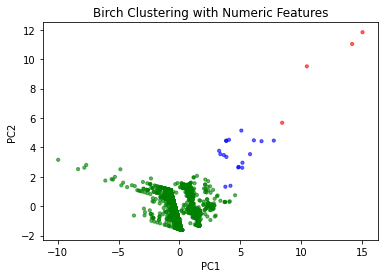

cluster 0: 4
cluster 1: 3072
cluster 2: 18


In [96]:
X = df[['Commercial Outbreak Count', 'Total Commercial Cases', 'Wild Outbreak Count', 'Month']].to_numpy()

birch = Birch(threshold=0.01, n_clusters=3).fit(X)

clusters = birch.predict(X)

# Plot 2 principal components with clustering (PCA)
X_scale = StandardScaler().fit_transform(X)

pca = PCA(n_components=2).fit(X_scale)

principalComponents = pca.fit_transform(X_scale)

pca_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pca_df['Cluster'] = clusters

colors = ['r', 'g', 'b']
pca_df['c'] = pca_df.Cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

plt.scatter(pca_df.PC1, pca_df.PC2, c=pca_df.c, alpha = 0.6, s=10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Birch Clustering with Numeric Features')
plt.show()

print('cluster 0:', len(pca_df[pca_df['Cluster'] == 0]))
print('cluster 1:', len(pca_df[pca_df['Cluster'] == 1]))
print('cluster 2:', len(pca_df[pca_df['Cluster'] == 2]))

## Clustering with more info

In [23]:
# print(comm.columns)
# print(wild.columns)

# Format Commercial dataset for clustering
# print(comm_format.columns)
comm_format2 = comm.groupby(['State', 'County', 'Month', 'Day']).agg({'Flock Type': ['count'], "Flock Size":['sum']})
comm_format2.columns = ['Commercial Outbreak Count', 'Total Commercial Cases']
comm_format2 = comm_format2.reset_index()
print(comm_format2.columns)

# Format wild dataset for clustering, add other info
# print(wild_format.columns)
wild_format2 = wild.groupby(['State', 'County', 'Month', 'Day', 'HPAI Strain', 'Bird Species', 'WOAH Classification']).agg({'HPAI Strain':['count']})
wild_format2.columns = ['Wild Outbreak Count']
wild_format2 = wild_format2.reset_index()

print(wild_format2.columns)

Index(['State', 'County', 'Month', 'Day', 'Commercial Outbreak Count',
       'Total Commercial Cases'],
      dtype='object')
Index(['State', 'County', 'Month', 'Day', 'HPAI Strain', 'Bird Species',
       'WOAH Classification', 'Wild Outbreak Count'],
      dtype='object')


In [24]:
df2 = comm_format2.merge(wild_format2, on=['State', 'County', 'Month', 'Day'], how='outer')
df2 = df2.fillna(0)

print(df2)

        State             County  Month  Day  Commercial Outbreak Count  \
0     Alabama           Lawrence     12    5                        1.0   
1      Alaska             Bethel      8    2                        1.0   
2      Alaska  Matanuska Susitna      4   29                        1.0   
3      Alaska  Matanuska Susitna     10    5                        2.0   
4      Alaska  Matanuska Susitna     10   14                        1.0   
...       ...                ...    ...  ...                        ...   
4159  Wyoming              Teton      6   10                        0.0   
4160  Wyoming              Teton      9   29                        0.0   
4161  Wyoming              Teton     10    4                        0.0   
4162  Wyoming              Teton     12   16                        0.0   
4163  Wyoming           Washakie      1   26                        0.0   

      Total Commercial Cases HPAI Strain      Bird Species  \
0                      460.0         

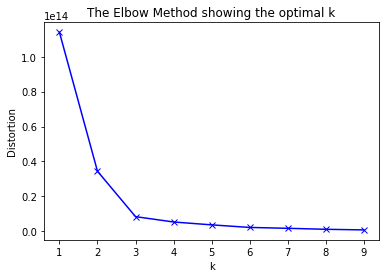

elbow is 3 so use 3 clusters


In [25]:
### Kmeans clustering
temp_dummies = df2[['Commercial Outbreak Count', 'Total Commercial Cases', 'Wild Outbreak Count', 'Month'
                   , 'HPAI Strain', 'Bird Species', 'WOAH Classification']]

# month_num = temp_dummies['Month']
# month_names = []
# for i in range(len(month_num)):
#     month_names.append(calendar.month_name[month_num[i]])

# temp_dummies['Month'] = month_names
df_dummies = pd.get_dummies(temp_dummies)

Xcols = df_dummies.columns.tolist()
# print(Xcols)
X = df_dummies.to_numpy()

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

print("elbow is 3 so use 3 clusters")

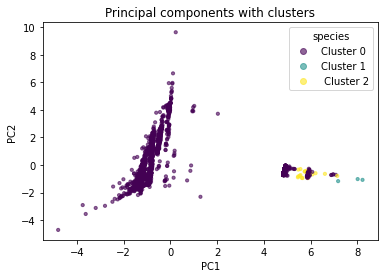

In [41]:
kmeans = KMeans(n_clusters=3).fit(X)

clusters = kmeans.predict(X)

# Plot 2 principal components with clustering (PCA)
X_scale = StandardScaler().fit_transform(X)

pca = PCA(n_components=2).fit(X_scale)

principalComponents = pca.fit_transform(X_scale)

pca_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Plot 2 principal components with clustering (PCA)
X_scale = StandardScaler().fit_transform(X)

pca = PCA(n_components=2).fit(X_scale)

principalComponents = pca.fit_transform(X_scale)

pca_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pca_df['Cluster'] = clusters

scatter = plt.scatter(pca_df.PC1, pca_df.PC2, c=pca_df.Cluster.astype('category').cat.codes, alpha = 0.6, s=10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal components with clusters')
plt.legend(handles=scatter.legend_elements()[0], labels = ["Cluster 0","Cluster 1"," Cluster 2"], title="species")
plt.show()

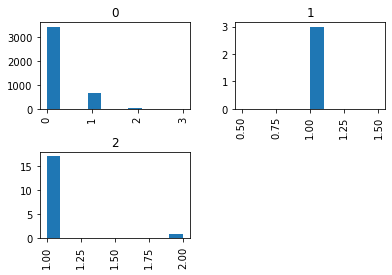

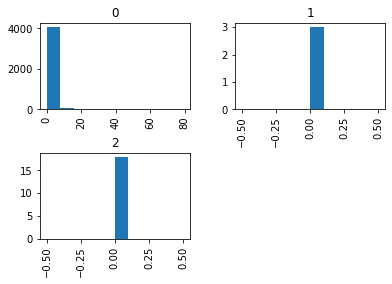

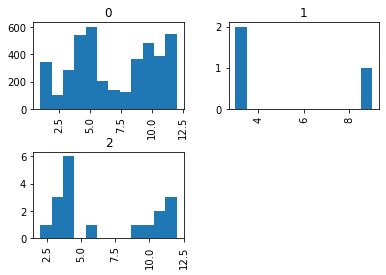

In [42]:
df_dummies['Cluster'] = clusters
    
df_dummies['Commercial Outbreak Count'].hist(by=df_dummies['Cluster'])
plt.show()

df_dummies['Wild Outbreak Count'].hist(by=df_dummies['Cluster'])
plt.show()

df_dummies['Month'].hist(by=df_dummies['Cluster'], bins=12)
plt.show()

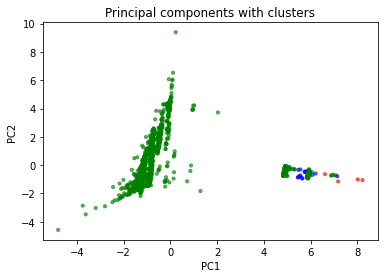

In [28]:
birch = Birch(threshold=0.01, n_clusters=3).fit(X)

clusters = birch.predict(X)

# Plot 2 principal components with clustering (PCA)
X_scale = StandardScaler().fit_transform(X)

pca = PCA(n_components=2).fit(X_scale)

principalComponents = pca.fit_transform(X_scale)

pca_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pca_df['Cluster'] = clusters

colors = ['r', 'g', 'b']
pca_df['c'] = pca_df.Cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

plt.scatter(pca_df.PC1, pca_df.PC2, c=pca_df.c, alpha = 0.6, s=10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal components with clusters')
plt.show()

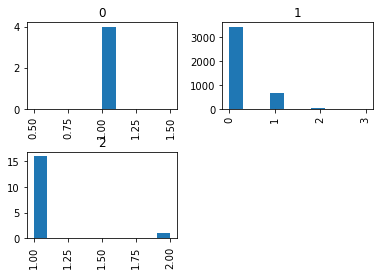

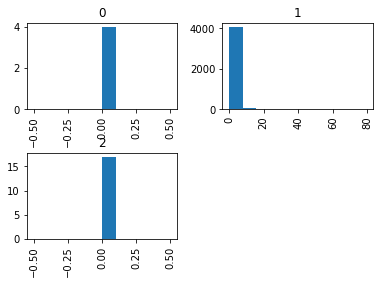

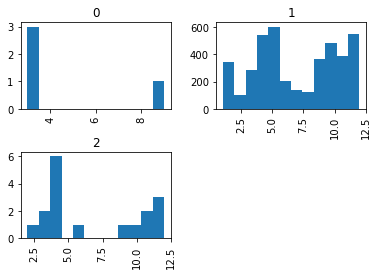

In [39]:
df_dummies['Cluster'] = clusters
    
df_dummies['Commercial Outbreak Count'].hist(by=df_dummies['Cluster'])
plt.show()

df_dummies['Wild Outbreak Count'].hist(by=df_dummies['Cluster'])
plt.show()

df_dummies['Month'].hist(by=df_dummies['Cluster'], bins=12)
plt.show()